# WeatherPy
----

## Setting up libraries 

In [1]:
# Uncomment below to install citipy 0.0.5 python library
# pip install citipy

In [1]:
# Libraries and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Make empty lists to create a random list of cities and its lat and long
lat_lngs = []
cities = []

# Use the .random.uniform function to create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Use the for loop to identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Call on API from OpenWeatherMap 
base_url = "http://api.openweathermap.org/data/2.5/weather"
example_city = "London"

In [4]:
# Build query URL
query_url = f"{base_url}?units=Imperial&appid={weather_api_key}" + f"&q={example_city}"
query_url


response = requests.get(query_url)
response # Note Response [400] is because we did not define a specific city id for the URL to research


response_json = response.json()
response_json

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 63.75,
  'feels_like': 63.45,
  'temp_min': 59.56,
  'temp_max': 65.95,
  'pressure': 1021,
  'humidity': 77},
 'visibility': 10000,
 'wind': {'speed': 3, 'deg': 267, 'gust': 14},
 'clouds': {'all': 90},
 'dt': 1623455847,
 'sys': {'type': 2,
  'id': 2019646,
  'country': 'GB',
  'sunrise': 1623469398,
  'sunset': 1623529057},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [5]:
# Alternative, using params dictionary
parameters = {
    'appid': weather_api_key,
    'q': example_city
}

In [6]:
# Grab weather data
weather_response = requests.get(url=base_url, params=parameters)

weather_json = weather_response.json()

print(f"The weather API responed with: {json.dumps(weather_json, indent=2)}.")

The weather API responed with: {
  "coord": {
    "lon": -0.1257,
    "lat": 51.5085
  },
  "weather": [
    {
      "id": 804,
      "main": "Clouds",
      "description": "overcast clouds",
      "icon": "04n"
    }
  ],
  "base": "stations",
  "main": {
    "temp": 290.91,
    "feels_like": 290.75,
    "temp_min": 288.46,
    "temp_max": 292.18,
    "pressure": 1021,
    "humidity": 77
  },
  "visibility": 10000,
  "wind": {
    "speed": 1.34,
    "deg": 267,
    "gust": 6.26
  },
  "clouds": {
    "all": 90
  },
  "dt": 1623455416,
  "sys": {
    "type": 2,
    "id": 2019646,
    "country": "GB",
    "sunrise": 1623469398,
    "sunset": 1623529057
  },
  "timezone": 3600,
  "id": 2643743,
  "name": "London",
  "cod": 200
}.


### Great API is working, next we need to use a for loop to grab each random city from the random list we created!

####  The format of the data will be:
- Processing Record 1 of Set 1 | [city name entered]
- Each set has a record of 50. Set 2 will begin after segments of 50s. 
- City names that are not found will be noted: (f"{cities_list} not found in this dataset")

In [7]:
# Call on API from OpenWeatherMap 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# Create an empty list to input the ramdom list of city
cities_list = []

## For the statement "Processing RECORD [1] of SET [1]" create a starting point for the for loop
begin_record = 1
begin_set = 1

# Set the number of sets created
for count, city in enumerate(cities):
    
    if (count % 50 == 0 and count >= 50): #the count for each row 
        begin_set += 1 #this is to continue adding on to the current number by 1 
        begin_record = 0 #this is to start the recound count all over again 
   
    # Create query url that goes through the cities API
    city_url = f"{base_url}?units=Imperial&appid={weather_api_key}" + f"&q={city}"
    
    print(f"Processing Record {begin_record} of Set {begin_set} | {city}")
    
    # Add 1 to the record count
    begin_record += 1
    
    # Run an API request for each of the cities
    try:
        
        # set up lists to hold response info
        coord_lat = []
        coord_lng = []
        main_temp_max = []
        main_humidity = []
        clouds_all = []
        wind_speed = []
        sys_country = []
        dt = []
        
        # Retrieve data
        city_data = requests.get(city_url).json()
        
        # Append the specific data
        coord_lat = city_data["coord"]["lat"]
        coord_lon = city_data["coord"]["lon"]
        main_temp_max = city_data["main"]["temp_max"]
        main_humidity = city_data["main"]["humidity"]
        clouds_all = city_data["clouds"]["all"]
        wind_speed = city_data["wind"]["speed"]
        sys_country = city_data["sys"]["country"]
        dt = city_data["dt"]
        
#         coord_lat.append(city_weather["coord"]["lat"])
#         coord_lon.append(city_weather["coord"]["lon"])
#         main_temp_max.append(city_weather["main"]["temp_max"])
#         main_humidity.append(city_weather["main"]["humidity"])
#         clouds_all.append(city_weather["clouds"]["all"])
#         wind_speed.append(city_weather["wind"]["speed"])
#         sys_country.append(city_weather["sys"]["country"])
#         dt.append(city_weather["dt"])
        

        # Append the city information into cities_list list
        cities_list.append({"City": city, 
                            "Lat": coord_lat, 
                            "Lng": coord_lon, 
                            "Max Temp": main_temp_max,
                            "Humidity": main_humidity,
                            "Cloudiness": clouds_all,
                            "Wind Speed": wind_speed,
                            "Country": sys_country,
                            "Date": dt})
    # Skipping cities when not found
    except KeyError:
        print(f"City not found in this dataset")
        pass

Processing Record 1 of Set 1 | coihaique
Processing Record 2 of Set 1 | ketchikan
Processing Record 3 of Set 1 | harper
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | narsaq
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | nioro
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | naze
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | illoqqortoormiut
City not found in this dataset
Processing Record 17 of Set 1 | shestakovo
Processing Record 18 of Set 1 | ribeiropolis
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | sao filipe
Processing Record 21 of Set 1 | apple valley
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | ribeira grande

Processing Record 37 of Set 4 | leopoldshohe
Processing Record 38 of Set 4 | champerico
Processing Record 39 of Set 4 | belyy yar
Processing Record 40 of Set 4 | franklin
Processing Record 41 of Set 4 | coquimbo
Processing Record 42 of Set 4 | muhos
Processing Record 43 of Set 4 | calbuco
Processing Record 44 of Set 4 | arraial do cabo
Processing Record 45 of Set 4 | sinkat
City not found in this dataset
Processing Record 46 of Set 4 | hassleholm
Processing Record 47 of Set 4 | puerto leguizamo
Processing Record 48 of Set 4 | lasa
Processing Record 49 of Set 4 | ginir
Processing Record 0 of Set 5 | mucuri
Processing Record 1 of Set 5 | tuktoyaktuk
Processing Record 2 of Set 5 | cherskiy
Processing Record 3 of Set 5 | clyde river
Processing Record 4 of Set 5 | saryshagan
City not found in this dataset
Processing Record 5 of Set 5 | solikamsk
Processing Record 6 of Set 5 | hualmay
Processing Record 7 of Set 5 | korla
Processing Record 8 of Set 5 | sioux lookout
Processing Record 9 of Set

Processing Record 22 of Set 8 | cururupu
Processing Record 23 of Set 8 | vaitupu
City not found in this dataset
Processing Record 24 of Set 8 | tungor
Processing Record 25 of Set 8 | eyl
Processing Record 26 of Set 8 | dangriga
Processing Record 27 of Set 8 | havre-saint-pierre
Processing Record 28 of Set 8 | songjianghe
Processing Record 29 of Set 8 | ust-kamchatsk
City not found in this dataset
Processing Record 30 of Set 8 | sambava
Processing Record 31 of Set 8 | bugene
Processing Record 32 of Set 8 | tromso
Processing Record 33 of Set 8 | andenes
Processing Record 34 of Set 8 | duluth
Processing Record 35 of Set 8 | pacific grove
Processing Record 36 of Set 8 | jijiga
Processing Record 37 of Set 8 | yeppoon
Processing Record 38 of Set 8 | chuy
Processing Record 39 of Set 8 | colares
Processing Record 40 of Set 8 | plettenberg bay
Processing Record 41 of Set 8 | darhan
Processing Record 42 of Set 8 | suntar
Processing Record 43 of Set 8 | sarangani
Processing Record 44 of Set 8 | y

Processing Record 7 of Set 12 | maxixe
Processing Record 8 of Set 12 | carutapera
Processing Record 9 of Set 12 | rengo
Processing Record 10 of Set 12 | puerto guzman
Processing Record 11 of Set 12 | oussouye
Processing Record 12 of Set 12 | paradwip
City not found in this dataset
Processing Record 13 of Set 12 | buala
Processing Record 14 of Set 12 | storsteinnes
Processing Record 15 of Set 12 | caravelas
Processing Record 16 of Set 12 | aklavik
Processing Record 17 of Set 12 | chakulia
Processing Record 18 of Set 12 | washington
Processing Record 19 of Set 12 | chor
Processing Record 20 of Set 12 | port blair
Processing Record 21 of Set 12 | hofn
Processing Record 22 of Set 12 | plainview
Processing Record 23 of Set 12 | abu dhabi
Processing Record 24 of Set 12 | malgobek
Processing Record 25 of Set 12 | mastic beach
Processing Record 26 of Set 12 | lodwar
Processing Record 27 of Set 12 | nurota
Processing Record 28 of Set 12 | poum
Processing Record 29 of Set 12 | togur
Processing R

In [16]:
# Convert array of JSONs into Pandas DataFrame
city_df = pd.DataFrame(cities_list)
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,coihaique,-45.5752,-72.0662,43.50,99,100,4.12,CL,1623456015
1,ketchikan,55.3422,-131.6461,61.05,51,81,3.31,US,1623456016
2,harper,4.3750,-7.7169,77.34,87,88,2.93,LR,1623456016
3,castro,-24.7911,-50.0119,51.75,90,7,0.87,BR,1623456017
4,east london,-33.0153,27.9116,68.74,43,40,8.12,ZA,1623455781
...,...,...,...,...,...,...,...,...,...
549,nome,64.5011,-165.4064,48.16,87,90,13.80,US,1623456241
550,governador dix-sept rosado,-5.4577,-37.5209,76.73,82,3,14.36,BR,1623456241
551,calvinia,-31.4707,19.7760,55.38,31,88,5.12,ZA,1623456242
552,pinotepa nacional,16.3167,-98.0167,77.86,81,100,2.26,MX,1623456242


In [17]:
# Save to csv
city_df.to_csv("../cities.csv")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Show Record Count
city_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [11]:
# Display the City Data Frame
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,coihaique,-45.5752,-72.0662,43.50,99,100,4.12,CL,1623456015
1,ketchikan,55.3422,-131.6461,61.05,51,81,3.31,US,1623456016
2,harper,4.3750,-7.7169,77.34,87,88,2.93,LR,1623456016
3,castro,-24.7911,-50.0119,51.75,90,7,0.87,BR,1623456017
4,east london,-33.0153,27.9116,68.74,43,40,8.12,ZA,1623455781
...,...,...,...,...,...,...,...,...,...
549,nome,64.5011,-165.4064,48.16,87,90,13.80,US,1623456241
550,governador dix-sept rosado,-5.4577,-37.5209,76.73,82,3,14.36,BR,1623456241
551,calvinia,-31.4707,19.7760,55.38,31,88,5.12,ZA,1623456242
552,pinotepa nacional,16.3167,-98.0167,77.86,81,100,2.26,MX,1623456242


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
# check if there are any cities that have humidity > 100% 
a = city_df['Humidity'] > 100
city_df['Humidity'].max() #no cities have the humidity > 100%

100

In [13]:
city_df['Humidity'].dtypes

dtype('int64')

In [14]:
## Create dataframe of the cities tha are under 100 or equal to 100
no_humid_city = city_df.loc[(city_df["Humidity"] <= 100)]                         
no_humid_city

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,coihaique,-45.5752,-72.0662,43.50,99,100,4.12,CL,1623456015
1,ketchikan,55.3422,-131.6461,61.05,51,81,3.31,US,1623456016
2,harper,4.3750,-7.7169,77.34,87,88,2.93,LR,1623456016
3,castro,-24.7911,-50.0119,51.75,90,7,0.87,BR,1623456017
4,east london,-33.0153,27.9116,68.74,43,40,8.12,ZA,1623455781
...,...,...,...,...,...,...,...,...,...
549,nome,64.5011,-165.4064,48.16,87,90,13.80,US,1623456241
550,governador dix-sept rosado,-5.4577,-37.5209,76.73,82,3,14.36,BR,1623456241
551,calvinia,-31.4707,19.7760,55.38,31,88,5.12,ZA,1623456242
552,pinotepa nacional,16.3167,-98.0167,77.86,81,100,2.26,MX,1623456242


In [15]:
# Export the City_Data into a csv
no_humid_city.to_csv("no_humid_city.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

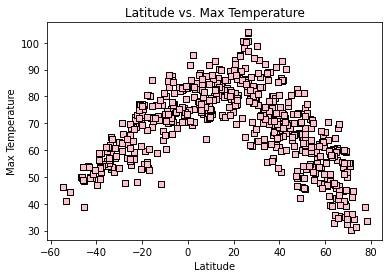

In [28]:
# Content
lat = no_humid_city["Lat"]
max_temp = no_humid_city["Max Temp"]

# Build scatter plot for latitude vs. temperature
plt.scatter(lat, 
            max_temp,
            c="pink",
            edgecolor ="black",
            marker="s", 
            alpha=1)

# Details for the graph
plt.title("Latitude vs. Max Temperature")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("graphs/Lat&Temp.png")

# Show plot
Lat_Temp = plt.show()
Lat_Temp

## Latitude vs. Humidity Plot

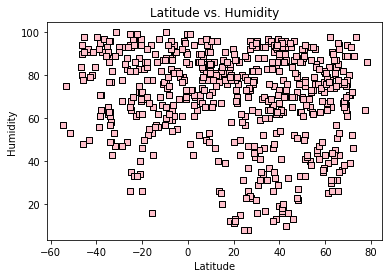

In [29]:
# Content
lat = no_humid_city["Lat"]
humidity = no_humid_city["Humidity"]

# Build the scatter plots for latitude vs. humidity
plt.scatter(lat, 
            humidity,
            c="pink",
            edgecolor ="black",
            marker="s", 
            alpha=1)

# Details for the graph
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("graphs/Lat&Humidity.png")

# Show plot
Humidity = plt.show()
Humidity

## Latitude vs. Cloudiness Plot

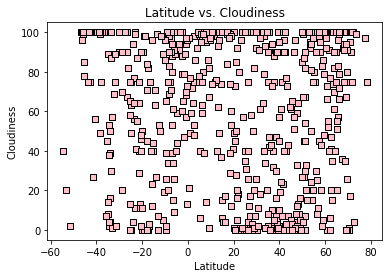

In [31]:
# Content
lat = no_humid_city["Lat"]
cloudiness = no_humid_city["Cloudiness"]

# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lat, 
            cloudiness,
            c="pink",
            edgecolor ="black",
            marker="s", 
            alpha=1)

# Details for the graph
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("graphs/Lat&Cloudiness.png")

# Show plot
Cloudiness = plt.show()
Cloudiness

## Latitude vs. Wind Speed Plot

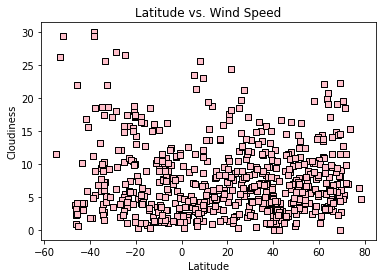

In [32]:
# Extract relevant fields from the data frame
lat = no_humid_city["Lat"]
wind_speed = no_humid_city["Wind Speed"]

# Build the scatter plots for latitude vs. wind speed
plt.scatter(no_humid_city["Lat"], 
            no_humid_city["Wind Speed"],
            c="pink",
            edgecolor ="black",
            marker="s", 
            alpha=1)

# Details for the graph
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("graphs/Lat&WindSpeed.png")

# Show plot
Lat_WindSpeed = plt.show()
Lat_WindSpeed

## Linear Regression

In [34]:
# # Linear Regression set up

# (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# regress_values = x_values * slope + intercept 
# print(regress_values)

In [35]:
# # Linear Regression set up
# (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# south_regress_values = x_values * slope + intercept 
# print(south_regress_values)

In [36]:
# # Create line equation string
# line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
# print(line_eq)

In [37]:
# Create Northern and Southern Hemisphere DataFrames
north_hemp_df = no_humid_city.loc[(no_humid_city["Lat"] >= 0)]
south_hemp_df = no_humid_city.loc[(no_humid_city["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5820733003294241


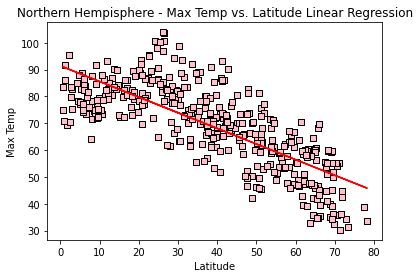

In [38]:
# Linear regression on Northern Hemisphere
north_hemp_x = north_hemp_df["Lat"]
norht_hemp_y = north_hemp_df["Max Temp"]

# Line Regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_hemp_x, norht_hemp_y)
regress_values = north_hemp_x * slope + intercept 

# Plot 
plt.scatter(north_hemp_x, 
            norht_hemp_y,
            c="pink",
            edgecolor ="black",
            marker="s", 
            alpha=1)
plt.plot(north_hemp_x, regress_values, "r-")
print(f"The r-squared is: {rvalue**2}")

# Details for the graph
plt.title("Northern Hempisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("graphs/NorthernMaxTemp&Latitude.png")

# Show plot
north_lat_maxtemp = plt.show()
north_lat_maxtemp

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6714232111844539


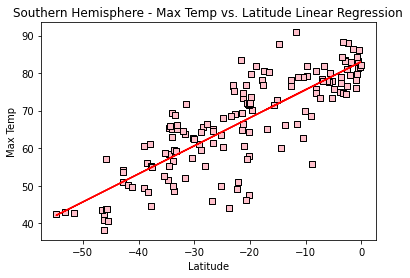

In [122]:
# Linear regression on Southern Hemisphere
south_hemi_x = south_hemp_df["Lat"]
south_hemi_y = south_hemp_df["Max Temp"]

# Line Regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_hemi_x, south_hemi_y)
regress_values = south_hemi_x * slope + intercept 

# Plot 
plt.scatter(south_hemi_x, 
            south_hemi_y,
            c="pink",
            edgecolor ="black",
            marker="s", 
            alpha=1)
plt.plot(south_hemi_x, regress_values, "r-")
print(f"The r-squared is: {rvalue**2}")

# Details for the graph
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("graphs/SoutherMaxTemp&Latitute.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00498521708830501


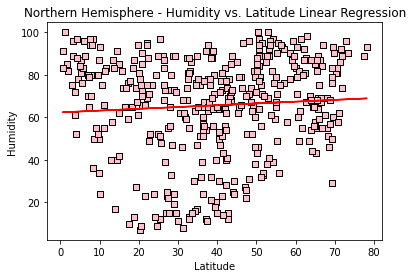

In [123]:
# Northern Hemisphere
north_hum_x = north_hemp_df["Lat"]
north_hum_y = north_hemp_df["Humidity"]

# Line Regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_hum_x, north_hum_y)
regress_values = north_hum_x * slope + intercept 

# Plot 
plt.scatter(north_hum_x, 
            north_hum_y,
            c="pink",
            edgecolor ="black",
            marker="s", 
            alpha=1)
plt.plot(north_hum_x, regress_values, "r-")
print(f"The r-squared is: {rvalue**2}")

# Details for the graph
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("graphs/NorthernHumidity&Latitute.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0344487699656845


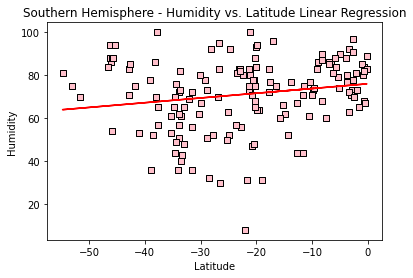

In [124]:
# Southern Hemisphere
south_hum_x = south_hemp_df["Lat"]
south_hum_y = south_hemp_df["Humidity"]

# Line Regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_hum_x, south_hum_y)
regress_values = south_hum_x * slope + intercept 


# Plot 
plt.scatter(south_hum_x, 
            south_hum_y,
            c="pink",
            edgecolor ="black",
            marker="s", 
            alpha=1)
plt.plot(south_hum_x, regress_values, "r-")
print(f"The r-squared is: {rvalue**2}")

# Details for the graph
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("graphs/SouthernHumidity&Latitute.png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002579887183209189


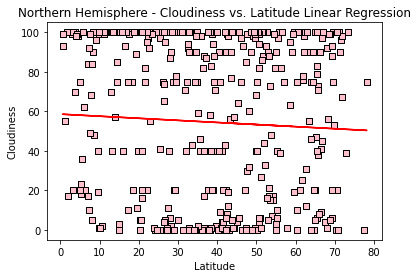

In [125]:
# Northern Hemisphere
north_cld_x = north_hemp_df["Lat"]
south_cld_y = north_hemp_df["Cloudiness"]

# Line Regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_cld_x, south_cld_y)
regress_values = north_cld_x * slope + intercept 

# Plot 
plt.scatter(north_cld_x, 
            south_cld_y,
            c="pink",
            edgecolor ="black",
            marker="s", 
            alpha=1)
plt.plot(north_cld_x, regress_values, "r-")
print(f"The r-squared is: {rvalue**2}")

# Details for the graph
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("graphs/NorthernCloudiness&Latitute.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06410171654287854


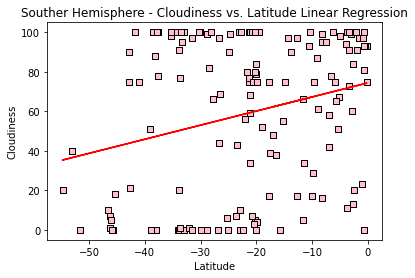

In [126]:
# Southern Hemisphere
south_cld_x = south_hemp_df["Lat"]
south_cld_y = south_hemp_df["Cloudiness"]

# Line Regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_cld_x, south_cld_y)
regress_values = south_cld_x * slope + intercept 

# Plot 
plt.scatter(south_cld_x, 
            south_cld_y,
            c="pink",
            edgecolor ="black",
            marker="s", 
            alpha=1)
plt.plot(south_cld_x, regress_values, "r-")
print(f"The r-squared is: {rvalue**2}")

# Details for the graph
plt.title("Souther Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("graphs/SouthernCloudiness&Latitute.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023329389427619054


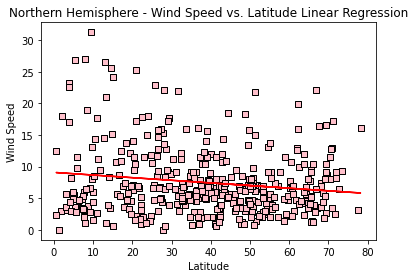

In [127]:
# Northern Hemisphere
north_wind_x = north_hemp_df["Lat"]
north_wind_y = north_hemp_df["Wind Speed"]

# Line Regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_wind_x, north_wind_y)
regress_values = north_wind_x * slope + intercept 


# Plot 
plt.scatter(north_wind_x, 
            north_wind_y,
            c="pink",
            edgecolor ="black",
            marker="s", 
            alpha=1)
plt.plot(north_wind_x, regress_values, "r-")
print(f"The r-squared is: {rvalue**2}")

# Details for the graph
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("graphs/NorthernWindSpeed&Latitute.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.002692378674759648


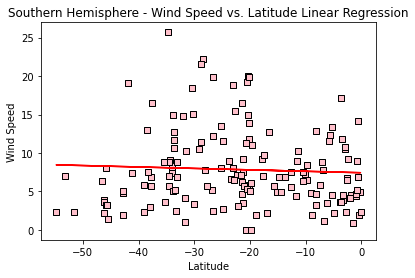

In [128]:
# Southern Hemisphere
south_wind_x = south_hemp_df["Lat"]
south_wind_y = south_hemp_df["Wind Speed"]

# Line Regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_wind_x, south_wind_y)
regress_values = south_wind_x * slope + intercept 

# Plot 
plt.scatter(south_wind_x, 
            south_wind_y,
            c="pink",
            edgecolor ="black",
            marker="s", 
            alpha=1)
plt.plot(south_wind_x, regress_values, "r-")
print(f"The r-squared is: {rvalue**2}")

# Details for the graph
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("graphs/SouthernWindSpeed&Latitute.png")

# Show plot
plt.show()

# Mini Analysis

-  For Part I, you must include a written description of three observable trends based on the data.

### Out of the 12 graphs that have been created, three of the most highest r-squared:

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression
- The r-squared is: 0.5820733003294241
- For the Northern Hemisphere, you could see that the curve wanes down from left to right. This shows that as tempature goes closer to the equator you can see that the tempature rises. The correlation between the tempature and latitude is not as high as the southern hemisphere's. 


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression
- The r-squared is: 0.6714232111844539
- For the Southern Hemisphere, you could see that the curve rises from the left to the right. As points are drafted onto the graph, the closer to the equator and higher the tempature. This graph has the highest correlation out of the other linear graphs. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
- The r-squared is: 0.06410171654287854
- This graph has the third highest correlation out of the graphs. However, we could see that the points are all scattered throughout the graph. There is more density towards the equator. And the cloudiness is relatively higher near the equator as well. An interesting observation is that the tempatures are higher, cloudiness are higher near the equator. This infers that not all clouds provide cooler winds as they provide shade. 